In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown


In [29]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [6]:
df = pd.read_csv(r'C:\Users\Yakub Pasha\OneDrive\Desktop\DSML Program\Module 5 - Data Analysis & Visualisation (Numpy & Pandas)\Class 1 - 15th Jan - Numpy 1\netflix_case_study.csv')

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.shape


(8807, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [11]:
df.describe(include = 'object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [13]:
df.isnull().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [14]:
df['type'].value_counts(normalize = True)*100

type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64

Analysis showing MOVIES Vs TV SHOWS     

<Axes: ylabel='count'>

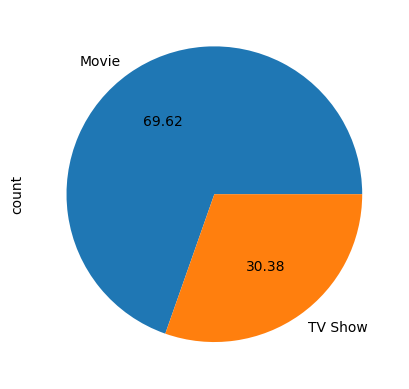

In [16]:
df['type'].value_counts().plot(kind='pie',autopct = "%.2f")

UN-NESTING Columns ('Cast','Country','Director','listed_in')

UNNESTING 'CAST' COLUMN

In [18]:
constraint = df['cast'].apply(lambda x: str(x).split(','))

df_new = pd.DataFrame(constraint.tolist(), index=df['title'])

df_new = df_new.stack()

df_new = pd.DataFrame(df_new)

df_new.reset_index(inplace=True)

df_new = df_new[['title',0]]

df_new.columns = ['title','cast']

df_new.cast.value_counts()

df_cast = df.reset_index().merge(df_new, on = 'title', how = 'inner')

df_cast.head()

,index,show_id,type,title,director,cast_x,country,date_added,release_year,rating,duration,listed_in,description,cast_y
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",nan
1,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata
2,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema
3,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane
4,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba


UNNESTING 'DIRECTOR' COLUMN

In [20]:
constraint1 = df['director'].apply(lambda x: str(x).split(','))

df_new1 = pd.DataFrame(constraint1.tolist(), index=df['title'])

df_new1 = df_new1.stack()

df_new1 = pd.DataFrame(df_new1)

df_new1.reset_index(inplace = True)

df_new1 = df_new1[['title',0]]

df_new1.columns = ['title','director']

df_director = df_cast.reset_index().merge(df_new1, on = 'title', how = 'inner')

df_director = df_director.drop(columns = ['level_0','index'], axis = 1)

df_director.head()

,show_id,type,title,director_x,cast_x,country,date_added,release_year,rating,duration,listed_in,description,cast_y,director_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",nan,Kirsten Johnson
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,nan
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema,nan
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane,nan
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba,nan


UNNESTING 'COUNTRY' COLUMN

In [22]:
constraint2 = df['country'].apply(lambda x: str(x).split(',')).tolist()

df_new2 = pd.DataFrame(constraint2, index=df['title'])

df_new2 = df_new2.stack()

df_new2 = pd.DataFrame(df_new2)

df_new2.reset_index(inplace = True)

df_new2 = df_new2[['title',0]]

df_new2.columns = ['title', 'country']

df_country = df_director.reset_index().merge(df_new2, how = 'inner', on = 'title')

df_country = df_country.drop(columns = 'index',axis=1)

df_country.head()


,show_id,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,listed_in,description,cast_y,director_y,country_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",nan,Kirsten Johnson,United States
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema,nan,South Africa
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane,nan,South Africa
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba,nan,South Africa


UNNESTING 'GENRE(LISTED_IN)' COLUMN

In [138]:
constraint3 = df['listed_in'].apply(lambda x: str(x).split(',')).tolist()

df_new3 = pd.DataFrame(constraint3, index=df['title'])

df_new3 = df_new3.stack()

df_new3 = pd.DataFrame(df_new3)

df_new3.reset_index(inplace=True)

df_new3 = df_new3[['title',0]]

df_new3.columns = ['title', 'listed_in']

df_unnested = df_country.reset_index().merge(df_new3, on = 'title', how = 'inner')

df_unnested.drop(columns = 'index', axis=1, inplace=True)

df_unnested

,show_id,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,listed_in_x,description,cast_y,director_y,country_y,listed_in_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",nan,Kirsten Johnson,United States,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema,nan,South Africa,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Mozez Singh,India,International Movies
202061,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Mozez Singh,India,Music & Musicals
202062,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Mozez Singh,India,Dramas
202063,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Mozez Singh,India,International Movies


In [139]:
constraint4 = df['duration'].apply(lambda x: str(x).split(' ')).tolist()

df_new4 = pd.DataFrame(constraint4, index=df['title'])

df_new4.reset_index(inplace = True)

df_new4.columns = ['title','duration', 'waste']

df_new5 = df_new4.drop(columns = 'waste', axis = 1)

df_unnested = df_unnested.rename(columns={'duration': 'duration_y'})

df_filtered = pd.merge(df_new5,df_unnested, on = 'title', how = 'inner')

df_filtered = df_filtered.loc[:, ~df_filtered.columns.duplicated()]

df_filtered = df_filtered.drop(columns = 'duration', axis = 1)

df_filtered.columns







Index(['title', 'show_id', 'type', 'director_x', 'cast_x', 'country_x',
       'date_added', 'release_year', 'rating', 'duration_y', 'listed_in_x',
       'description', 'cast_y', 'director_y', 'country_y', 'listed_in_y'],
      dtype='object')

In [142]:
df_filtered.columns

Index(['title', 'show_id', 'type', 'director_x', 'cast_x', 'country_x',
       'date_added', 'release_year', 'rating', 'duration_y', 'listed_in_x',
       'description', 'cast_y', 'director_y', 'country_y', 'listed_in_y'],
      dtype='object')

HANDLING MISSING & NULL VALUES

In [146]:
df_filtered.isna().sum()

title               0
show_id             0
type                0
director_x      50643
cast_x           2149
country_x       11897
date_added        158
release_year        0
rating             67
duration_y          3
listed_in_x         0
description         0
cast_y              0
director_y          0
country_y           0
listed_in_y         0
dtype: int64

In [147]:
df_filtered =df_filtered.replace(['nan'],np.nan)
df_filtered =df_filtered.replace(['nan'],np.NaN)

In [148]:
df_filtered.isna().sum()

title               0
show_id             0
type                0
director_x      50643
cast_x           2149
country_x       11897
date_added        158
release_year        0
rating             67
duration_y          3
listed_in_x         0
description         0
cast_y           2149
director_y      50643
country_y       11897
listed_in_y         0
dtype: int64

In [149]:
df_filtered['director_y'].replace(np.nan, 'No Data', inplace=True)

C:\Users\Yakub Pasha\AppData\Local\Temp\ipykernel_20432\2684022858.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered['director_y'].replace(np.nan, 'No Data', inplace=True)


In [150]:
df_filtered['cast_y'].replace(np.nan, 'No Data', inplace=True)

C:\Users\Yakub Pasha\AppData\Local\Temp\ipykernel_20432\4239647116.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered['cast_y'].replace(np.nan, 'No Data', inplace=True)


In [151]:
df_filtered['country_y'] = df_filtered['country_y'].fillna(df_filtered['country_y'].mode()[0])

In [152]:
df_filtered['duration_y'].replace(np.nan, 'No Data', inplace=True)

C:\Users\Yakub Pasha\AppData\Local\Temp\ipykernel_20432\3377348757.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered['duration_y'].replace(np.nan, 'No Data', inplace=True)


In [155]:
df_filtered['date_added'].fillna('Unknown', inplace=True)
df_filtered['date_added'] = pd.to_datetime(df_filtered['date_added'], errors='coerce')

In [167]:
df_filtered['date_added'].replace(np.nan, 'No Data', inplace=True)


C:\Users\Yakub Pasha\AppData\Local\Temp\ipykernel_20432\456490719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered['date_added'].replace(np.nan, 'No Data', inplace=True)


In [169]:
df_filtered['duration'] = df_filtered['duration'].str.extract('(\d+)')
df_filtered['duration'] = pd.to_numeric(df_filtered['duration'], errors='coerce')

In [171]:
df_filtered

,title,show_id,type,date_added,release_year,rating,duration,description,cast,director,country,listed_in
0,Dick Johnson Is Dead,s1,Movie,2021-09-25 00:00:00,2020,PG-13,90.0,"As her father nears the end of his life, filmm...",No Data,Kirsten Johnson,United States,Documentaries
1,Blood & Water,s2,TV Show,2021-09-24 00:00:00,2021,TV-MA,2.0,"After crossing paths at a party, a Cape Town t...",Ama Qamata,No Data,South Africa,International TV Shows
2,Blood & Water,s2,TV Show,2021-09-24 00:00:00,2021,TV-MA,2.0,"After crossing paths at a party, a Cape Town t...",Ama Qamata,No Data,South Africa,TV Dramas
3,Blood & Water,s2,TV Show,2021-09-24 00:00:00,2021,TV-MA,2.0,"After crossing paths at a party, a Cape Town t...",Ama Qamata,No Data,South Africa,TV Mysteries
4,Blood & Water,s2,TV Show,2021-09-24 00:00:00,2021,TV-MA,2.0,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,No Data,South Africa,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,s8807,Movie,2019-03-02 00:00:00,2015,TV-14,111.0,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Mozez Singh,India,International Movies
202061,Zubaan,s8807,Movie,2019-03-02 00:00:00,2015,TV-14,111.0,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Mozez Singh,India,Music & Musicals
202062,Zubaan,s8807,Movie,2019-03-02 00:00:00,2015,TV-14,111.0,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Mozez Singh,India,Dramas
202063,Zubaan,s8807,Movie,2019-03-02 00:00:00,2015,TV-14,111.0,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Mozez Singh,India,International Movies


In [181]:
df_filtered['date_added'] = df_filtered['date_added'].replace('No Data', pd.NaT)
df_filtered['date_added'] = pd.to_datetime(df_filtered['date_added'])

In [182]:
df_filtered['month_added'] = df_filtered['date_added'].dt.month
df_filtered['month_name_added'] = df_filtered['date_added'].dt.month_name()
df_filtered['year_added'] = df_filtered['date_added'].dt.year

In [190]:
df_filtered['month_added'].fillna(0,inplace=True)
df_filtered['month_name_added'].fillna(0,inplace=True)
df_filtered[ 'year_added'].fillna(0,inplace=True)

C:\Users\Yakub Pasha\AppData\Local\Temp\ipykernel_20432\4183129668.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered['month_added'].fillna(0,inplace=True)
C:\Users\Yakub Pasha\AppData\Local\Temp\ipykernel_20432\4183129668.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [194]:

df_filtered['month_added'] = df_filtered['month_added'].astype(int)

df_filtered['year_added'] = df_filtered['year_added'].astype(int)

1. Find the counts of each categorical variable both using graphical and nongraphical analysis.
    
    a. NON GRAPHICAL ANALYSIS

In [204]:
# Count of each category for 'type' column
type_counts = df_filtered['type'].value_counts()
print("Counts of each category for 'type' column:")
print(type_counts)
print()

# Count of each category for 'rating' column
rating_counts = df_filtered['rating'].value_counts()
print("Counts of each category for 'rating' column:")
print(rating_counts)
print()

# Count of each category for 'country' column
country_counts = df_filtered['country'].value_counts()
print("Counts of each category for 'country' column:")
print(country_counts)
print()

# Count of each category for 'listed_in' column
listed_in_counts = df_filtered['listed_in'].value_counts()
print("Counts of each category for 'listed_in' column:")
print(listed_in_counts)
print()

Counts of each category for 'type' column:
type
Movie      145917
TV Show     56148
Name: count, dtype: int64

Counts of each category for 'rating' column:
rating
TV-MA       73915
TV-14       43957
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
No Data        70
Name: count, dtype: int64

Counts of each category for 'country' column:
country
United States     61765
India             22139
United Kingdom     9733
 United States     9482
Japan              7317
                  ...  
 Samoa                2
 Sri Lanka            2
 Kazakhstan           1
 Uganda               1
 Nicaragua            1
Name: count, Length: 197, dtype: int64

Counts of each category for 'listed_in' column:
listed_in
 International Movies    27141
Dramas                   19657
Comedies                 13894
Action & Adventure       12216


b. GRAPHICAL ANALYSIS

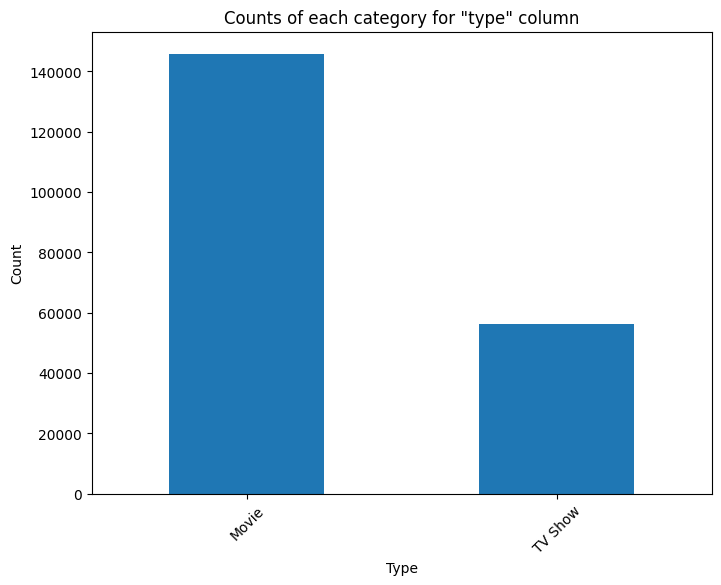

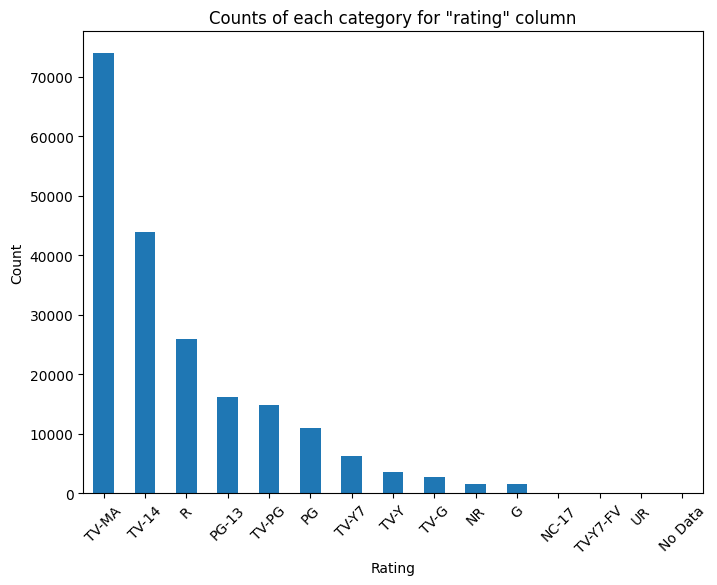

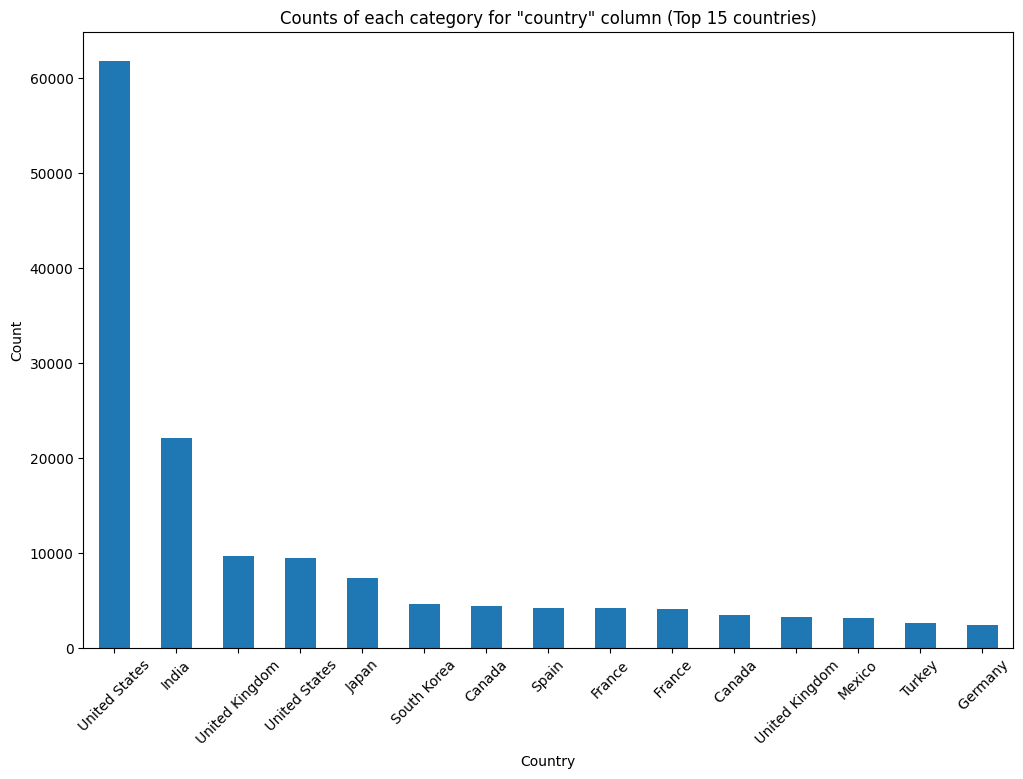

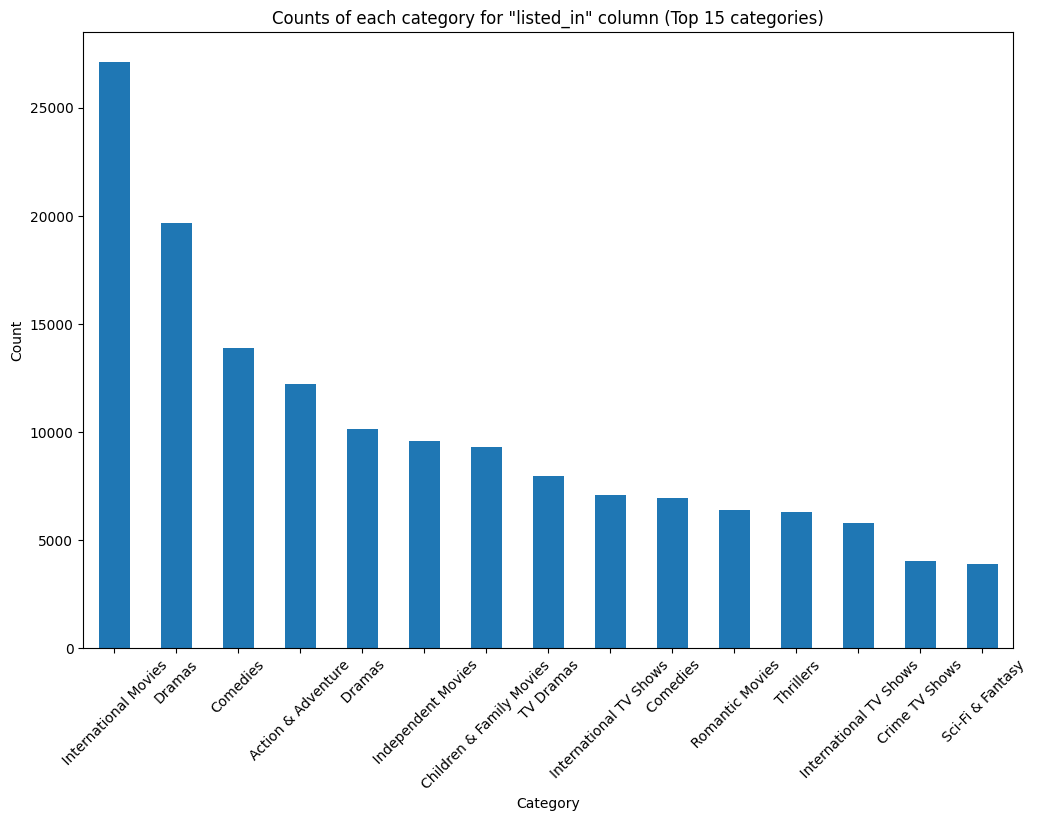

In [208]:
# Plot counts of 'type' column
plt.figure(figsize=(8, 6))
df_filtered['type'].value_counts().plot(kind='bar')
plt.title('Counts of each category for "type" column')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot counts of 'rating' column
plt.figure(figsize=(8, 6))
df_filtered['rating'].value_counts().plot(kind='bar')
plt.title('Counts of each category for "rating" column')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot counts of 'country' column 
plt.figure(figsize=(12, 8))
df_filtered['country'].value_counts().head(15).plot(kind='bar')
plt.title('Counts of each category for "country" column (Top 15 countries)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot counts of 'listed_in' column 
plt.figure(figsize=(12, 8))
df_filtered['listed_in'].value_counts().head(15).plot(kind='bar')
plt.title('Counts of each category for "listed_in" column (Top 15 categories)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

2. Comparison of tv shows vs. movies.

     a. Find the number of movies produced in each country and pick the top 10 countries.


In [222]:
df_filtered['country'] = df_filtered['country'].str.strip().str.lower()

df_movies = df_filtered[df_filtered['type']=='Movie']
movies_by_country = df_movies.groupby('country')['title'].nunique().sort_values(ascending = False)
top_10_movies_countries = movies_by_country.head(10)

print("Top 10 countries with the most movies:")
print(top_10_movies_countries)



Top 10 countries with the most movies:
country
united states     3192
india              962
united kingdom     534
canada             319
france             303
germany            182
spain              171
japan              119
china              114
mexico             111
Name: title, dtype: int64


b. Find the number of Tv-Shows produced in each country and pick the top 10 
countries.

In [223]:
df_tv_shows = df_filtered[df_filtered['type']=='TV Show']
tv_shows_by_country = df_tv_shows.groupby('country')['title'].nunique().sort_values(ascending = False)
top_10_tv_shows_countries = tv_shows_by_country.head(10)

print("Top 10 countries with the most TV Shows:")
print(top_10_tv_shows_countries)

Top 10 countries with the most TV Shows:
country
united states     1329
united kingdom     272
japan              199
south korea        170
canada             126
france              90
india               84
taiwan              70
australia           66
spain               61
Name: title, dtype: int64


3. What is the best time to launch a TV show?
       
       a. Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies


In [236]:
df_filtered['date_added'] = pd.to_datetime(df_filtered['date_added'])
df_filtered['week_added'] = df_filtered['date_added'].dt.isocalendar().week

best_week_movies = df_filtered[df_filtered['type'] == 'Movie'].groupby('week_added').size().idxmax()
print("Best Week to Release Movies:", best_week_movies)

best_week_tv_shows = df_filtered[df_filtered['type'] == 'TV Show'].groupby('week_added').size().idxmax()
print("Best Week to Release TV Shows:", best_week_tv_shows)

Best Week to Release Movies: 1
Best Week to Release TV Shows: 27


b. Find which is the best month to release the Tv-show or the movie. Do the 
analysis separately for Tv-shows and Movies


In [239]:
best_month_movies = df_filtered[df_filtered['type'] == 'Movie'].groupby('month_name_added').size().idxmax()
print("Best Month to Release Movies:", best_month_movies)

best_month_tv_shows = df_filtered[df_filtered['type'] == 'TV Show'].groupby('month_name_added').size().idxmax()
print("Best Month to Release TV Shows:", best_month_tv_shows)

Best Month to Release Movies: July
Best Month to Release TV Shows: December


4. Analysis of actors/directors of different types of shows/movies.
         
        a. Identify the top 10 actors who have appeared in most movies or TV shows.

Top 10 actors who have appeared in most movies or TV shows:
               cast  title
0       anupam kher     43
1    shah rukh khan     35
2     julie tejwani     33
3  naseeruddin shah     32
4  takahiro sakurai     32
5      rupa bhimani     31
6      akshay kumar     30
7           om puri     30
8         yuki kaji     29
9  amitabh bachchan     28


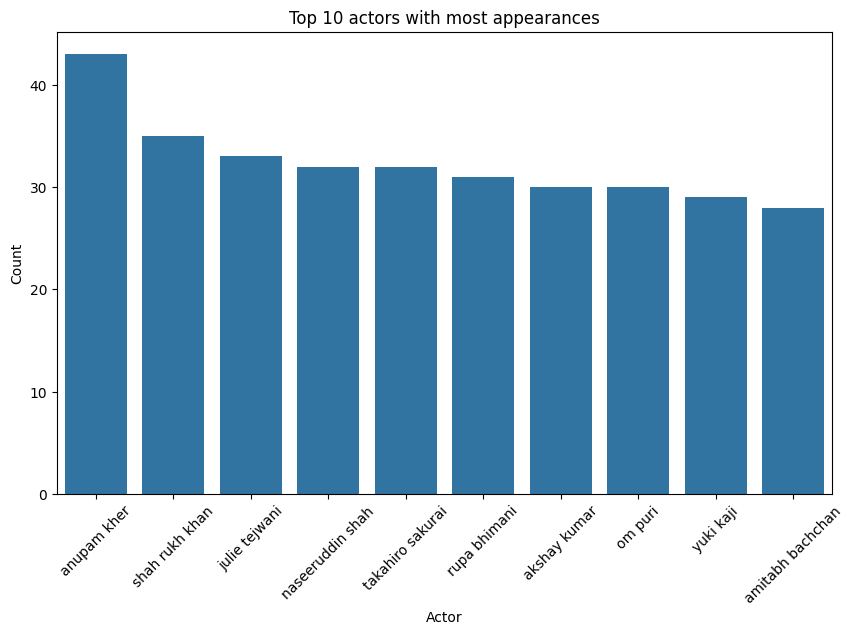

In [286]:
df_filtered['cast'] = df_filtered['cast'].str.strip().str.lower()
filtered_df = df_filtered[df_filtered['cast'] != 'no data']

top_10_actors = filtered_df.groupby('cast')['title'].nunique().nlargest(10).reset_index()
print("Top 10 actors who have appeared in most movies or TV shows:")
print(top_10_actors)

# Graphical Analysis
plt.figure(figsize=(10, 6))
sns.barplot(data= top_10_actors, x = 'cast',y='title')
plt.xlabel('Actor')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Top 10 actors with most appearances')
plt.show()

b. Identify the top 10 directors who have appeared in most movies or TV shows

Top 10 directors who have appeared in most movies or TV shows:
              director  title
0        rajiv chilaka     22
1            jan suter     21
2          raúl campos     19
3         marcus raboy     16
4          suhas kadav     16
5            jay karas     15
6  cathy garcia-molina     13
7          jay chapman     12
8      martin scorsese     12
9      youssef chahine     12


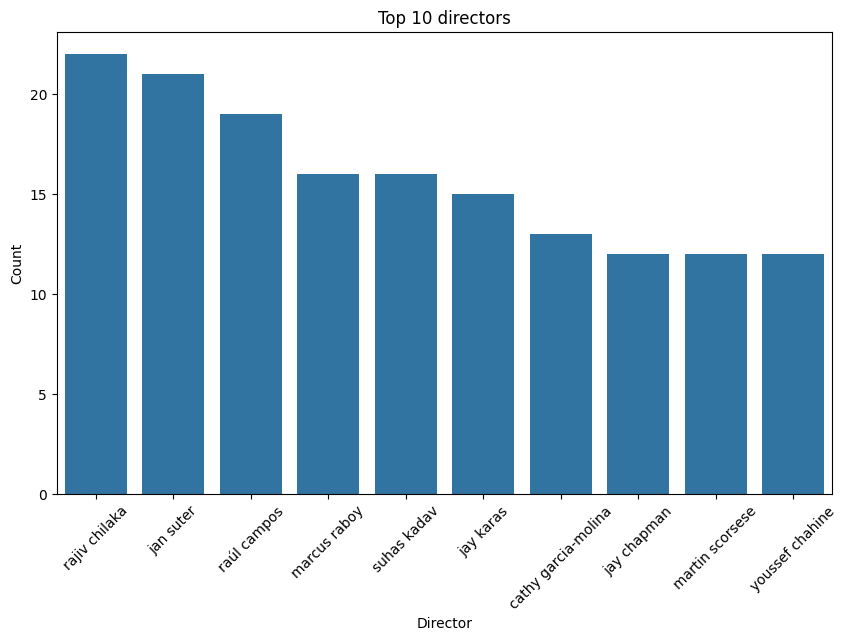

In [287]:
df_filtered['director'] = df_filtered['director'].str.strip().str.lower()
filtered_dir_df = df_filtered[df_filtered['director'] != 'no data']

top_10_directors = filtered_dir_df.groupby('director')['title'].nunique().nlargest(10).reset_index()
print("Top 10 directors who have appeared in most movies or TV shows:")
print(top_10_directors)

# Graphical Analysis
plt.figure(figsize=(10,6))
sns.barplot(data= top_10_directors, x = 'director', y='title')
plt.xticks(rotation = 45)
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Top 10 directors')
plt.show()

5. Which genre movies are more popular or produced more

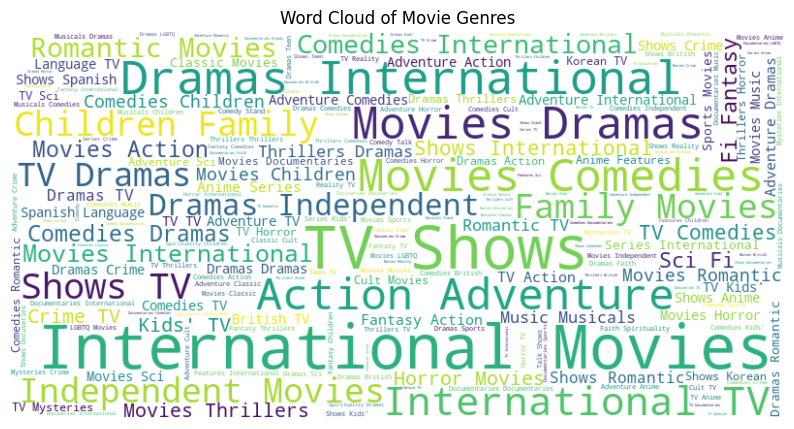

In [257]:
genres_text = ' '.join(df_filtered['listed_in'])

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Movie Genres')
plt.axis('off')
plt.show()

6. Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)

In [267]:
df_movies = df_filtered[df_filtered['type'] == 'Movie']
df_movies = df_movies.copy()
df_movies['time_to_add'] = (pd.to_datetime(df_movies['date_added']) - pd.to_datetime(df_movies['release_year'], format='%Y')).dt.days

mode_time_to_add = df_movies['time_to_add'].mode()[0]

print('Mode time to add: {} days'.format(mode_time_to_add))

Mode time to add: 1369 days


Content Type Analysis:

Distribution of Content Types:
type
Movie      145917
TV Show     56148
Name: count, dtype: int64


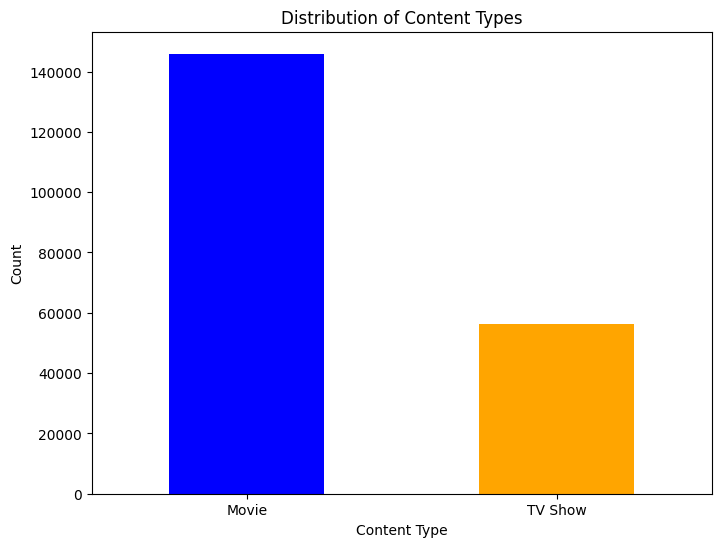

In [268]:
content_type_counts = df_filtered['type'].value_counts()
print("Distribution of Content Types:")
print(content_type_counts)

plt.figure(figsize=(8, 6))
content_type_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Geographical Analysis:

Top 10 countries with the most content:
country
united states     71247
india             22814
united kingdom    12965
japan              8679
france             8254
canada             7915
spain              5315
south korea        5043
germany            4383
mexico             3941
Name: count, dtype: int64


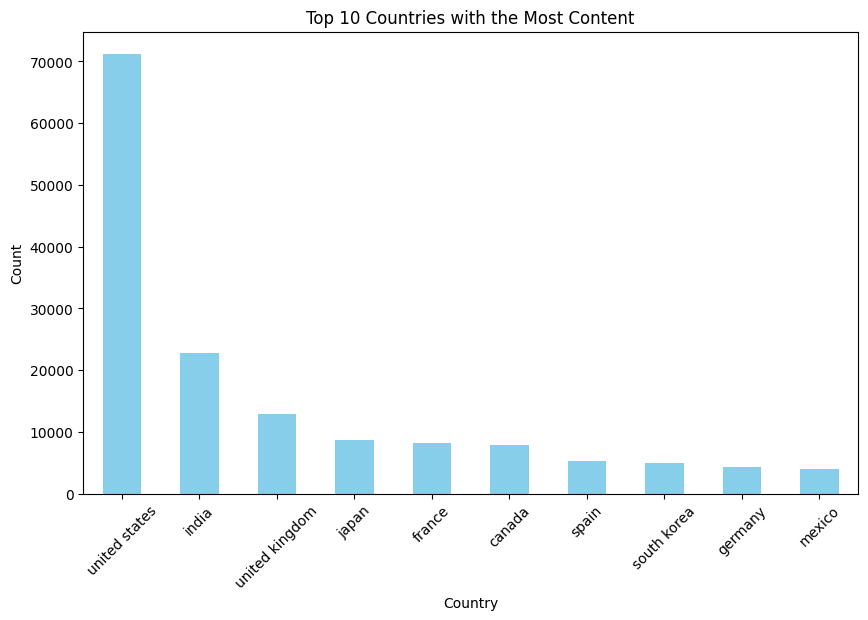

In [269]:
country_counts = df_filtered['country'].value_counts()
top_countries = country_counts.head(10)
print("Top 10 countries with the most content:")
print(top_countries)

plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with the Most Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Analyze the popularity of content based on ratings:

Average Ratings by Type of Content:
rating        G  NC-17      NR  No Data       PG    PG-13        R    TV-14  \
type                                                                          
Movie    1530.0  149.0  1418.0     12.0  10919.0  16246.0  25806.0  29266.0   
TV Show     NaN    NaN   155.0     58.0      NaN      NaN     54.0  14691.0   

rating     TV-G    TV-MA    TV-PG    TV-Y   TV-Y7  TV-Y7-FV    UR  
type                                                               
Movie    1738.0  44009.0  10312.0  1878.0  2486.0      62.0  86.0  
TV Show  1041.0  29906.0   4614.0  1787.0  3818.0      24.0   NaN  


<Figure size 1200x600 with 0 Axes>

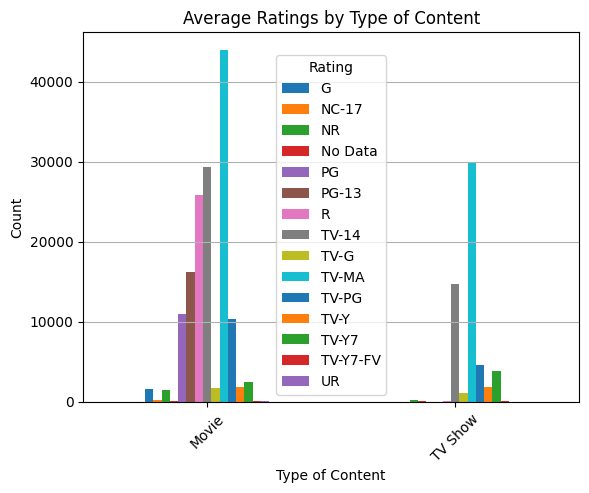

In [274]:
avg_rating_by_type = df_filtered.groupby('type')['rating'].value_counts().unstack()
print("Average Ratings by Type of Content:")
print(avg_rating_by_type)

plt.figure(figsize=(12, 6))
avg_rating_by_type.plot(kind='bar')
plt.title('Average Ratings by Type of Content')
plt.xlabel('Type of Content')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Rating')
plt.show()

Duration Distribution for Movies and TV Shows

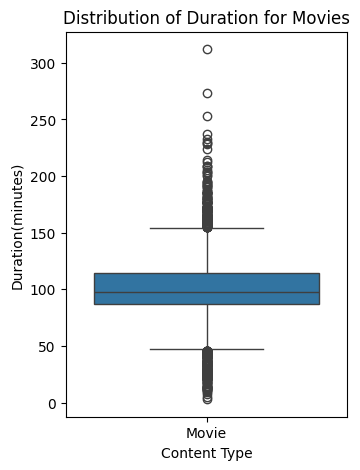

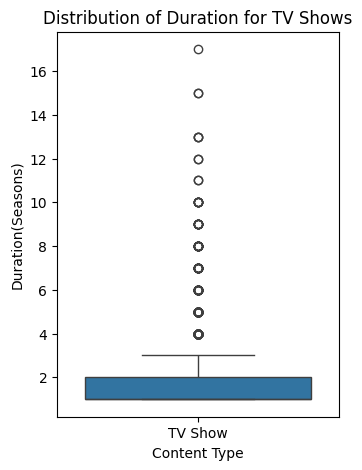

In [305]:
df_movies = df[df['type']=='Movie']
df_movies = df_movies.copy()
df_movies['duration'] = df_movies['duration'].str.extract('(\d+)', expand=False).astype(float)

plt.figure(figsize = (8,5))
plt.subplot(1,2,1)
sns.boxplot(data = df_movies, x = 'type',y='duration')
plt.xlabel('Content Type')
plt.ylabel('Duration(minutes)')
plt.title('Distribution of Duration for Movies')
plt.show()


df_tv_shows = df[df['type']=='TV Show']
df_tv_shows = df_tv_shows.copy()
df_tv_shows['duration'] = df_tv_shows['duration'].str.extract('(\d+)', expand=False).astype(float)

plt.figure(figsize = (8,5))
plt.subplot(1,2,2)
sns.boxplot(data = df_tv_shows, x = 'type',y='duration')
plt.xlabel('Content Type')
plt.ylabel('Duration(Seasons)')
plt.title('Distribution of Duration for TV Shows')
plt.show()